# Combo Offer Optimization Analysis

## 1. Import Required Libraries

In [ ]:
import sys
sys.path.append('/workspaces/Combo-Offer-Optimizer/') # '/path/to/your/project'

In [ ]:
import pandas as pd
import numpy as np
from src.optimizer import ComboOfferOptimizer
from src.support_calculator import calculate_support
from src.utils import load_product_hierarchy, load_transactions

In [7]:
# Load the synthetic data (generated from generate_synthetic_data.py)
product_hierarchy = pd.read_csv("../synthetic_product_hierarchy.csv")
transactions = pd.read_csv("../synthetic_transactions.csv")["Products"].apply(eval).tolist()

# Define prices and inventory (can be updated based on real data)
product_prices = {
    "Laptop": 1000, "Mouse": 20, "Keyboard": 50, "Smartphone": 800, "Earphones": 150,
    "Tablet": 600, "Camera": 1200, "Speaker": 150, "Charger": 30, "Smartwatch": 200
}

inventory_levels = {
    "Laptop": 10, "Mouse": 100, "Keyboard": 50, "Smartphone": 200, "Earphones": 150,
    "Tablet": 80, "Camera": 20, "Speaker": 120, "Charger": 300, "Smartwatch": 60
}

# Define retailer objectives
objectives = {
    "revenue_growth": 1, 
    "inventory_clearance": 1, 
    "category_growth": 0.5, 
    "customer_retention": 0.5
}

# 2. Initialize the Combo Offer Optimizer

In [8]:
optimizer = ComboOfferOptimizer(transactions, product_hierarchy, product_prices, inventory_levels, objectives)

# 3. Run the optimization

In [9]:
optimized_combos = optimizer.optimize_all_levels()

# 4. Analyze the results for Product Level

In [10]:
optimized_combos["Product"].head()

,Product_X,Product_Y,Support_X,Support_Y,Support_XY,Lift,Price_X,Price_Y,Inventory_X,Inventory_Y,Basket_Value,Overstock_Factor,Customer_Preference_Score,Score
32,Camera,Laptop,0.322,0.296,0.089,0.933775,1200,1000,20,10,2200,0.476190,0.425686,2200.689034
39,Camera,Smartphone,0.322,0.295,0.088,0.926413,1200,800,20,200,2000,9.523810,0.898292,2009.972955
20,Laptop,Smartphone,0.296,0.295,0.098,1.122309,1000,800,10,200,1800,18.181818,0.409601,1818.386619
10,Camera,Tablet,0.322,0.278,0.087,0.971893,1200,600,20,80,1800,3.809524,0.677086,1804.148067
24,Laptop,Tablet,0.296,0.278,0.071,0.862823,1000,600,10,80,1600,7.272727,0.399055,1607.472255


# 5. Visualize the Best Offers

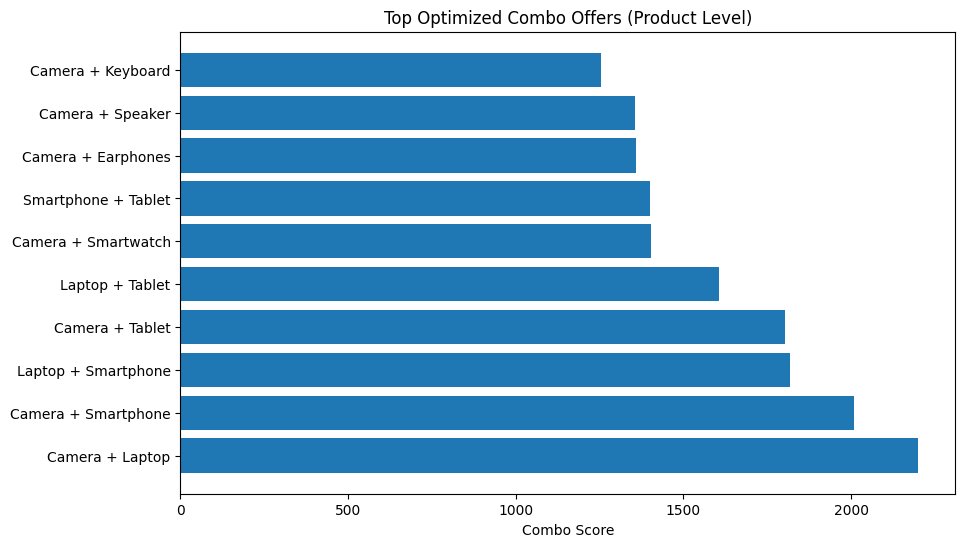

In [11]:
import matplotlib.pyplot as plt

# Example: Visualize the top combos for Product level
top_combos = optimized_combos["Product"].head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_combos[f"Product_X"] + " + " + top_combos[f"Product_Y"], top_combos["Score"])
plt.xlabel("Combo Score")
plt.title("Top Optimized Combo Offers (Product Level)")
plt.show()